In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Afficher les 5 premières lignes
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Vérifier les valeurs manquantes dans le dataset
missing_values = df.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
print(missing_values)


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [4]:
# Afficher uniquement les colonnes avec des valeurs manquantes
missing_values = missing_values[missing_values > 0]
print(missing_values)


Series([], dtype: int64)


In [5]:
# Afficher les types de données de chaque colonne
print(df.dtypes)


loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [6]:
# Afficher un résumé statistique des colonnes numériques
print(df.describe())


           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

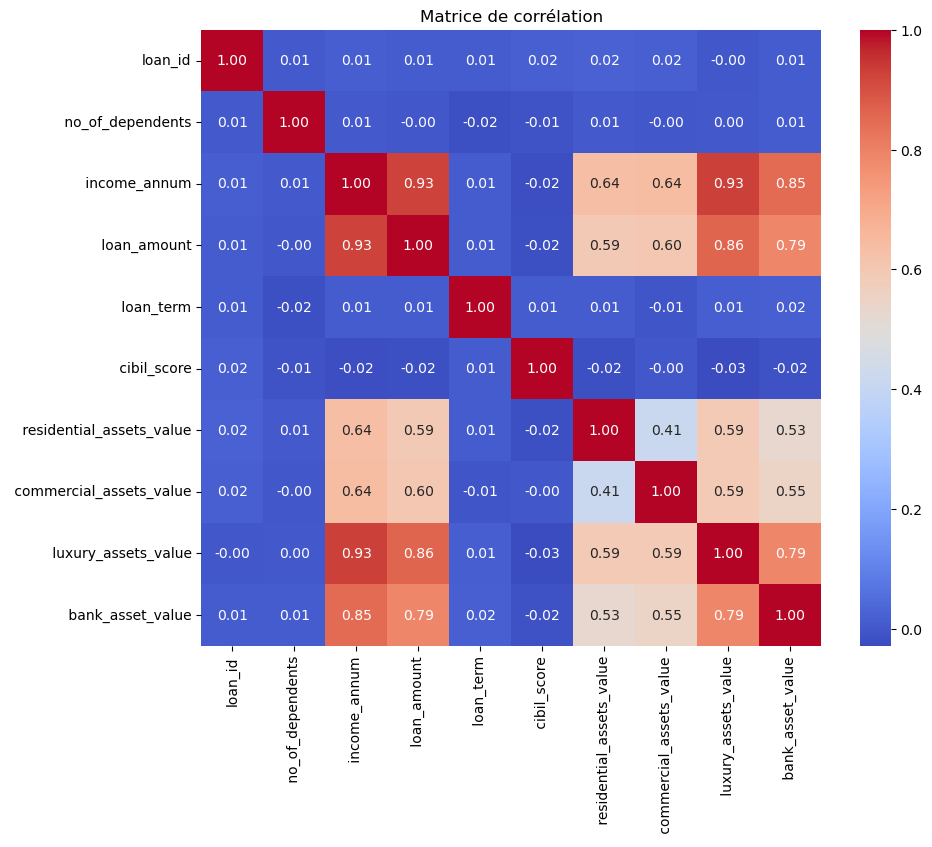

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# Sélectionner uniquement les colonnes numériques avant de calculer la corrélation
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Vérifier si la matrice est vide
if correlation_matrix.empty:
    print("Aucune corrélation trouvée, vérifie les colonnes numériques de ton dataset.")
else:
    # Afficher la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice de corrélation")
    plt.show()




Noms des colonnes dans le DataFrame : Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


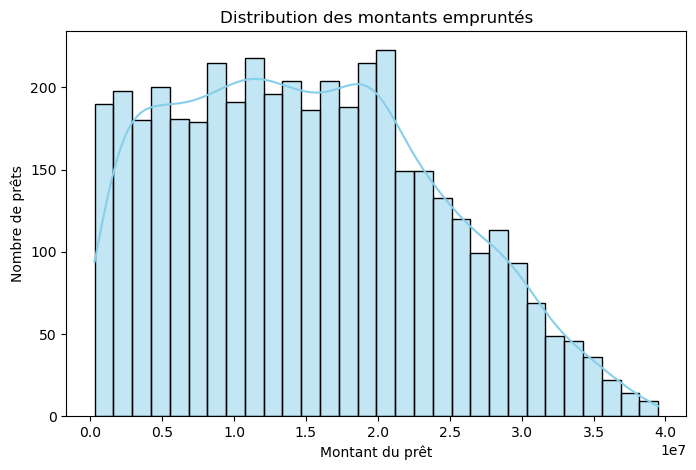

In [8]:
#Histogramme des montants empruntés
print("Noms des colonnes dans le DataFrame :", df.columns)  # Vérifie les colonnes
df.columns = df.columns.str.strip()  # Supprime les espaces éventuels

# Vérifie si 'loan_amount' est bien présent
if 'loan_amount' not in df.columns:
    print("Erreur : La colonne 'loan_amount' n'existe pas. Vérifie les noms des colonnes.")
else:
    # Tracer l'histogramme
    plt.figure(figsize=(8, 5))
    sns.histplot(df['loan_amount'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution des montants empruntés')
    plt.xlabel('Montant du prêt')
    plt.ylabel('Nombre de prêts')
    plt.show()



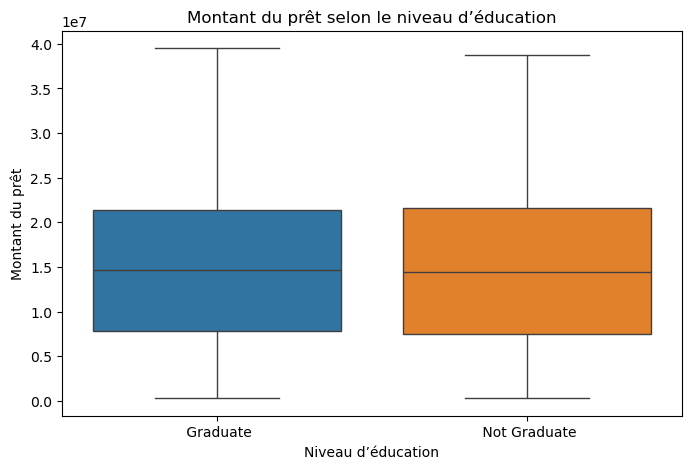

In [9]:
df.columns = df.columns.str.strip()  # Supprime les espaces cachés dans les noms de colonnes
plt.figure(figsize=(8, 5))
sns.boxplot(x='education', y='loan_amount', data=df, hue='education', legend=False)
plt.title('Montant du prêt selon le niveau d’éducation')
plt.xlabel('Niveau d’éducation')
plt.ylabel('Montant du prêt')
plt.show()

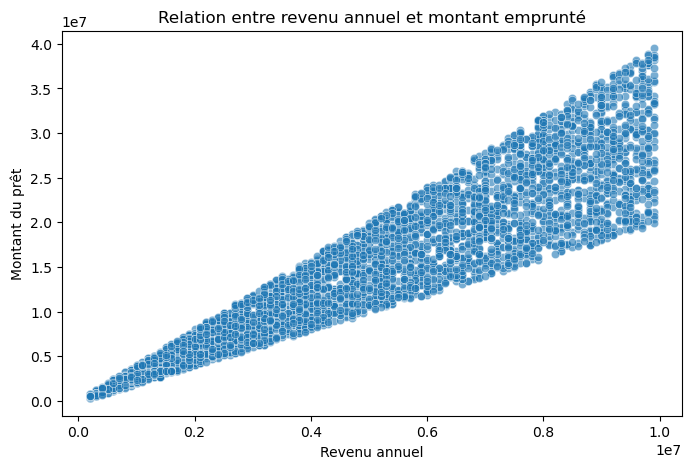

In [10]:
df.columns = df.columns.str.strip()  # Supprime les espaces cachés dans les noms de colonnes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='income_annum', y='loan_amount', data=df, alpha=0.6)
plt.title('Relation entre revenu annuel et montant emprunté')
plt.xlabel('Revenu annuel')
plt.ylabel('Montant du prêt')
plt.show()


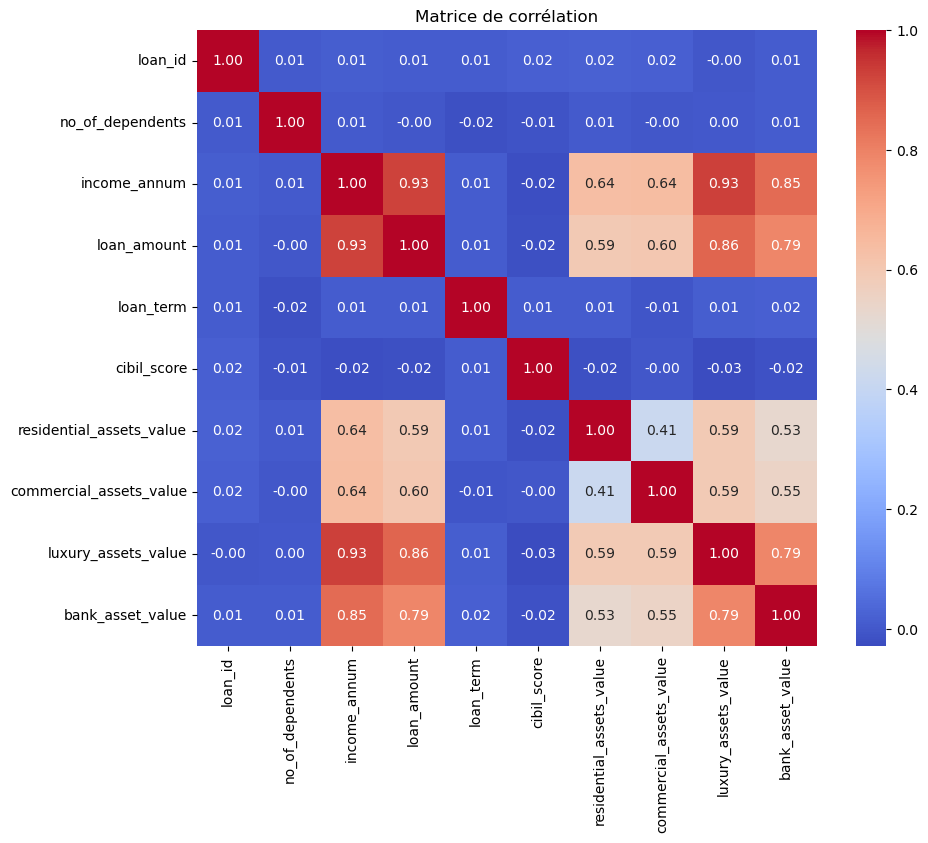

In [11]:
df.columns = df.columns.str.strip()  # Supprime les espaces cachés dans les noms de colonnes
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [12]:
%who


correlation_matrix	 df	 missing_values	 pd	 plt	 sns	 


In [13]:
# Voir le nombre et le pourcentage de valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Afficher uniquement les colonnes avec des valeurs manquantes
missing_data = pd.DataFrame({'Valeurs Manquantes': missing_values, 'Pourcentage (%)': missing_percentage})
print(missing_data[missing_data['Valeurs Manquantes'] > 0].sort_values(by='Pourcentage (%)', ascending=False))


Empty DataFrame
Columns: [Valeurs Manquantes, Pourcentage (%)]
Index: []


In [14]:
# Identifier les colonnes catégorielles (types 'object' ou 'category')
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Colonnes catégorielles :")
print(categorical_columns)


Colonnes catégorielles :
Index(['education', 'self_employed', 'loan_status'], dtype='object')


In [15]:
# One-Hot Encoding pour les colonnes 'education' et 'self_employed'
df = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)

print(df.head())  # Pour vérifier l'encodage


   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  education_ Not Graduate  \
0             22700000           8000000    Approved                    False   
1 

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encoder 'loan_status' en binaire (Approved = 1, Rejected = 0)
label_encoder = LabelEncoder()
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

print(df.head())  # Pour vérifier


   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  loan_status  \
0             22700000           8000000            0   
1              8800000           3300000          

In [17]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer le scaler aux colonnes numériques
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())


    loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0 -1.731645         -0.294102      1.617979     1.633052   0.192617   
1 -1.730834         -1.473548     -0.341750    -0.324414  -0.508091   
2 -1.730022          0.295621      1.439822     1.610933   1.594031   
3 -1.729211          0.295621      1.119139     1.721525  -0.508091   
4 -1.728399          1.475067      1.689242     1.002681   1.594031   

   cibil_score  residential_assets_value  commercial_assets_value  \
0     1.032792                 -0.780058                 2.877289   
1    -1.061051                 -0.733924                -0.631921   
2    -0.544840                 -0.057300                -0.107818   
3    -0.771045                  1.649637                -0.381263   
4    -1.264055                  0.757724                 0.735304   

   luxury_assets_value  bank_asset_value  loan_status  \
0             0.832028          0.930304            0   
1            -0.694993         -0.515936    

In [18]:
from sklearn.model_selection import train_test_split

# Séparer les variables indépendantes (X) et la variable cible (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Séparer les données en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(3415, 12) (854, 12)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle de régression logistique
logreg = LogisticRegression()

# Entraîner le modèle
logreg.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy * 100:.2f}%')

# Afficher un rapport détaillé (précision, rappel, f1-score)
print(classification_report(y_test, y_pred))


Accuracy : 90.63%
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



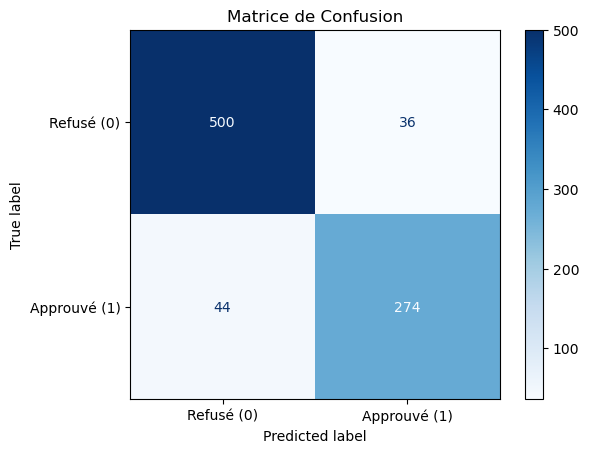

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec une heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Refusé (0)", "Approuvé (1)"])
disp.plot(cmap="Blues")
plt.title("Matrice de Confusion")
plt.show()

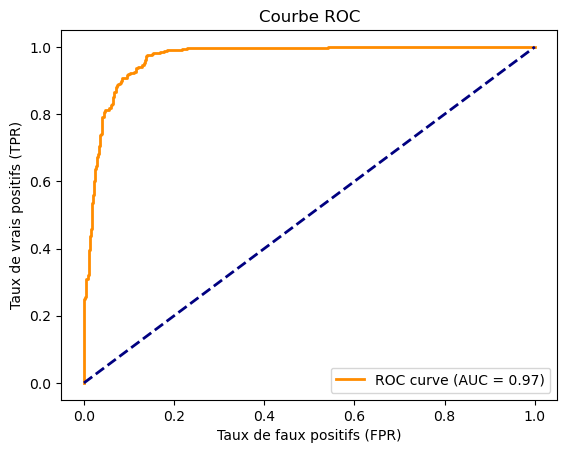

In [21]:
from sklearn.metrics import roc_curve, auc

# Probabilités prédites avec logreg
y_probs = logreg.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

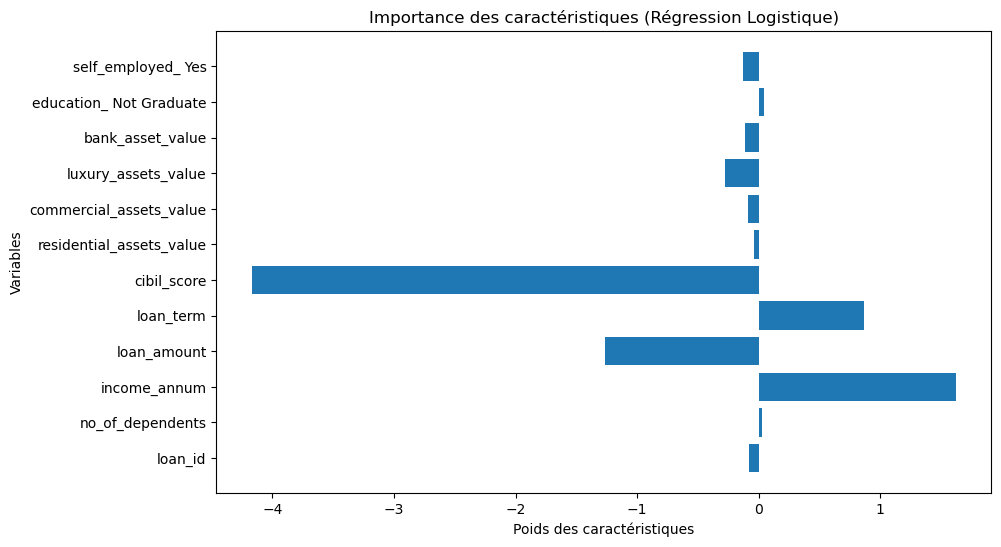

In [22]:
# Importance des caractéristiques pour la régression logistique
import numpy as np

coefficients = logreg.coef_[0]
features = X_train.columns

# Afficher les caractéristiques les plus importantes
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients)
plt.xlabel("Poids des caractéristiques")
plt.ylabel("Variables")
plt.title("Importance des caractéristiques (Régression Logistique)")
plt.show()


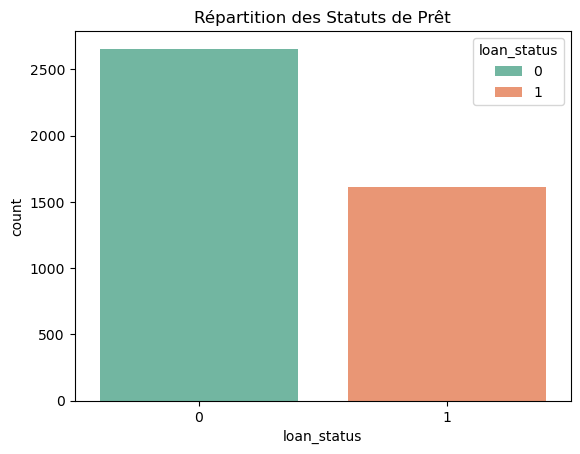

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_status', data=df, hue='loan_status', palette='Set2')
plt.title('Répartition des Statuts de Prêt')
plt.show()

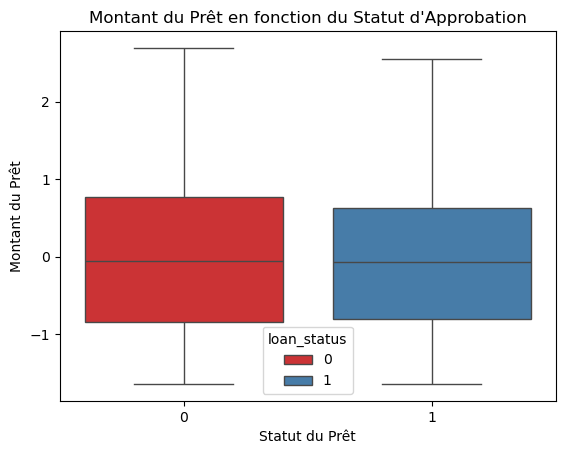

In [24]:
sns.boxplot(x='loan_status', y='loan_amount', data=df,  hue='loan_status', palette='Set1')
plt.title("Montant du Prêt en fonction du Statut d'Approbation")
plt.xlabel("Statut du Prêt")
plt.ylabel("Montant du Prêt")
plt.show()